In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Importing Data

In [396]:
data1 = pd.read_csv('CREDIT CARD USERS DATA.csv')


C:\Users\thebu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [397]:
data1.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### seprating numerical and categorical variables

In [398]:
#seprating numerical and categorical variables
numeric_var_names=[key for key in dict(data1.dtypes) if dict(data1.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data1.dtypes) if dict(data1.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['region', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'othdebt', 'default', 'jobsat', 'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'carditems', 'cardspent', 'card2items', 'card2spent', 'active', 'bfast', 'tenure', 'churn', 'longmon', 'lnlongmon', 'tollfre

In [399]:
cat_var_names

['custid',
 'townsize',
 'birthmonth',
 'lncreddebt',
 'lnothdebt',
 'commutetime',
 'longten',
 'lnlongten',
 'lntollmon',
 'lntollten',
 'lnequipmon',
 'lnequipten',
 'lncardmon',
 'cardten',
 'lncardten',
 'lnwiremon',
 'lnwireten']

In [400]:
data_num=data1[numeric_var_names]
data_cat=data1[cat_var_names]

In [401]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
custid         5000 non-null object
townsize       5000 non-null object
birthmonth     5000 non-null object
lncreddebt     5000 non-null object
lnothdebt      5000 non-null object
commutetime    5000 non-null object
longten        5000 non-null object
lnlongten      5000 non-null object
lntollmon      5000 non-null object
lntollten      5000 non-null object
lnequipmon     5000 non-null object
lnequipten     5000 non-null object
lncardmon      5000 non-null object
cardten        5000 non-null object
lncardten      5000 non-null object
lnwiremon      5000 non-null object
lnwireten      5000 non-null object
dtypes: object(17)
memory usage: 664.1+ KB


In [402]:
data_cat.head()

,custid,townsize,birthmonth,lncreddebt,lnothdebt,commutetime,longten,lnlongten,lntollmon,lntollten,lnequipmon,lnequipten,lncardmon,cardten,lncardten,lnwiremon,lnwireten
0,3964-QJWTRG-NPN,2.00,September,0.18,0.81,22.00,34.40,3.54,3.37,5.08,3.38,4.84,2.66,60.00,4.09,#NULL!,#NULL!
1,0648-AIPJSP-UVM,5.00,May,0.20,0.45,29.00,330.60,5.80,#NULL!,#NULL!,4.00,7.59,2.77,610.00,6.41,3.82,7.43
2,5195-TLUDJE-HVO,4.00,June,-0.07,0.93,24.00,1858.35,7.53,#NULL!,#NULL!,#NULL!,#NULL!,3.14,1410.00,7.25,#NULL!,#NULL!
3,4459-VLPQUH-3OL,3.00,May,-3.78,0.11,38.00,199.45,5.30,#NULL!,#NULL!,#NULL!,#NULL!,3.04,685.00,6.53,#NULL!,#NULL!
4,8158-SMTQFB-CNO,2.00,July,-1.54,-1.74,32.00,74.10,4.31,2.80,5.96,#NULL!,#NULL!,2.85,360.00,5.89,2.95,6.02


#### creating dummy variables for birthmonth

In [403]:
#creating dummy variables for birthmonth
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [404]:
for c_feature in ['birthmonth']:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat , c_feature )

C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [405]:
data_cat.head()

,custid,townsize,lncreddebt,lnothdebt,commutetime,longten,lnlongten,lntollmon,lntollten,lnequipmon,...,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
0,3964-QJWTRG-NPN,2.00,0.18,0.81,22.00,34.40,3.54,3.37,5.08,3.38,...,0,0,0,0,0,0,0,0,0,1
1,0648-AIPJSP-UVM,5.00,0.20,0.45,29.00,330.60,5.80,#NULL!,#NULL!,4.00,...,0,0,0,0,0,0,1,0,0,0
2,5195-TLUDJE-HVO,4.00,-0.07,0.93,24.00,1858.35,7.53,#NULL!,#NULL!,#NULL!,...,0,0,0,0,1,0,0,0,0,0
3,4459-VLPQUH-3OL,3.00,-3.78,0.11,38.00,199.45,5.30,#NULL!,#NULL!,#NULL!,...,0,0,0,0,0,0,1,0,0,0
4,8158-SMTQFB-CNO,2.00,-1.54,-1.74,32.00,74.10,4.31,2.80,5.96,#NULL!,...,0,0,0,1,0,0,0,0,0,0


#### handling missing values

##### replacing missing values with mean value of data

In [728]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T
num_summary


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,5000.0,0.0,15007.000,3.001400,3.00,1.421760,2.021402,1.00,1.00,1.00,1.00,2.00,3.00,4.0000,5.000,5.0000,5.000000,5.0000
gender,5000.0,0.0,2518.000,0.503600,1.00,0.500037,0.250037,0.00,0.00,0.00,0.00,0.00,1.00,1.0000,1.000,1.0000,1.000000,1.0000
age,5000.0,0.0,235128.000,47.025600,47.00,17.770338,315.784902,18.00,18.00,20.00,23.00,31.00,47.00,62.0000,72.000,76.0000,79.000000,79.0000
agecat,5000.0,0.0,21194.000,4.238800,4.00,1.308785,1.712917,2.00,2.00,2.00,2.00,3.00,4.00,5.0000,6.000,6.0000,6.000000,6.0000
ed,5000.0,0.0,72721.000,14.544200,14.00,3.242553,10.514149,8.00,8.00,9.00,10.00,12.00,14.00,17.0000,19.000,20.0000,21.000000,21.0000
edcat,5000.0,0.0,13360.000,2.672000,2.00,1.211738,1.468310,1.00,1.00,1.00,1.00,2.00,2.00,4.0000,4.000,5.0000,5.000000,5.0000
jobcat,5000.0,0.0,13764.000,2.752800,2.00,1.737900,3.020296,1.00,1.00,1.00,1.00,1.00,2.00,4.0000,6.000,6.0000,6.000000,6.0000
union,5000.0,0.0,756.000,0.151200,0.00,0.358280,0.128364,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,1.000,1.0000,1.000000,1.0000
employ,5000.0,0.0,48490.000,9.698000,7.00,9.581689,91.808758,0.00,0.00,0.00,0.00,2.00,7.00,15.0000,25.000,31.0000,39.000000,39.0000
empcat,5000.0,0.0,14663.000,2.932600,3.00,1.453300,2.112080,1.00,1.00,1.00,1.00,2.00,3.00,4.0000,5.000,5.0000,5.000000,5.0000


In [407]:
#handling missing values
#data[data_cat.townsize.isnull()]
data_cat[data_cat.lntollmon.isna()]

,custid,townsize,lncreddebt,lnothdebt,commutetime,longten,lnlongten,lntollmon,lntollten,lnequipmon,...,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September


In [408]:
data_cat = data_cat.replace('#NULL!','')
    

In [409]:
data_cat.head()

,custid,townsize,lncreddebt,lnothdebt,commutetime,longten,lnlongten,lntollmon,lntollten,lnequipmon,...,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
0,3964-QJWTRG-NPN,2.00,0.18,0.81,22.00,34.40,3.54,3.37,5.08,3.38,...,0,0,0,0,0,0,0,0,0,1
1,0648-AIPJSP-UVM,5.00,0.20,0.45,29.00,330.60,5.80,,,4.00,...,0,0,0,0,0,0,1,0,0,0
2,5195-TLUDJE-HVO,4.00,-0.07,0.93,24.00,1858.35,7.53,,,,...,0,0,0,0,1,0,0,0,0,0
3,4459-VLPQUH-3OL,3.00,-3.78,0.11,38.00,199.45,5.30,,,,...,0,0,0,0,0,0,1,0,0,0
4,8158-SMTQFB-CNO,2.00,-1.54,-1.74,32.00,74.10,4.31,2.80,5.96,,...,0,0,0,1,0,0,0,0,0,0


##### removing columns with high number of missing data

In [410]:
data_cat = data_cat.drop(columns = ['lntollmon','lntollten','lnequipmon','lnequipten','lnwiremon','lnwireten'])

In [411]:
data_cat.head()

,custid,townsize,lncreddebt,lnothdebt,commutetime,longten,lnlongten,lncardmon,cardten,lncardten,...,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
0,3964-QJWTRG-NPN,2.00,0.18,0.81,22.00,34.40,3.54,2.66,60.00,4.09,...,0,0,0,0,0,0,0,0,0,1
1,0648-AIPJSP-UVM,5.00,0.20,0.45,29.00,330.60,5.80,2.77,610.00,6.41,...,0,0,0,0,0,0,1,0,0,0
2,5195-TLUDJE-HVO,4.00,-0.07,0.93,24.00,1858.35,7.53,3.14,1410.00,7.25,...,0,0,0,0,1,0,0,0,0,0
3,4459-VLPQUH-3OL,3.00,-3.78,0.11,38.00,199.45,5.30,3.04,685.00,6.53,...,0,0,0,0,0,0,1,0,0,0
4,8158-SMTQFB-CNO,2.00,-1.54,-1.74,32.00,74.10,4.31,2.85,360.00,5.89,...,0,0,0,1,0,0,0,0,0,0


##### replacing missing values in rest with mean value

In [412]:
data_cat.columns

Index(['custid', 'townsize', 'lncreddebt', 'lnothdebt', 'commutetime',
       'longten', 'lnlongten', 'lncardmon', 'cardten', 'lncardten',
       'birthmonth_August', 'birthmonth_December', 'birthmonth_February',
       'birthmonth_January', 'birthmonth_July', 'birthmonth_June',
       'birthmonth_March', 'birthmonth_May', 'birthmonth_November',
       'birthmonth_October', 'birthmonth_September'],
      dtype='object')

In [413]:
data_cat.townsize = pd.to_numeric(data_cat.townsize)
data_cat.lncreddebt = pd.to_numeric(data_cat.lncreddebt)
data_cat.lnothdebt = pd.to_numeric(data_cat.lnothdebt)
data_cat.commutetime = pd.to_numeric(data_cat.commutetime)
data_cat.longten = pd.to_numeric(data_cat.longten)
data_cat.lnlongten = pd.to_numeric(data_cat.lnlongten)
data_cat.lncardmon = pd.to_numeric(data_cat.lncardmon)
data_cat.cardten = pd.to_numeric(data_cat.cardten)
data_cat.lncardten = pd.to_numeric(data_cat.lncardten)

In [414]:
data_cat.commutetime = data_cat.commutetime.fillna(data_cat.commutetime.mean())


In [415]:
data_cat.longten = data_cat.longten.fillna(data_cat.longten.mean())

In [416]:
data_cat.head()

,custid,townsize,lncreddebt,lnothdebt,commutetime,longten,lnlongten,lncardmon,cardten,lncardten,...,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
0,3964-QJWTRG-NPN,2.0,0.18,0.81,22.0,34.40,3.54,2.66,60.0,4.09,...,0,0,0,0,0,0,0,0,0,1
1,0648-AIPJSP-UVM,5.0,0.20,0.45,29.0,330.60,5.80,2.77,610.0,6.41,...,0,0,0,0,0,0,1,0,0,0
2,5195-TLUDJE-HVO,4.0,-0.07,0.93,24.0,1858.35,7.53,3.14,1410.0,7.25,...,0,0,0,0,1,0,0,0,0,0
3,4459-VLPQUH-3OL,3.0,-3.78,0.11,38.0,199.45,5.30,3.04,685.0,6.53,...,0,0,0,0,0,0,1,0,0,0
4,8158-SMTQFB-CNO,2.0,-1.54,-1.74,32.0,74.10,4.31,2.85,360.0,5.89,...,0,0,0,1,0,0,0,0,0,0


#### Handling Outliers

In [417]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

data_num = data_num.apply(outlier_capping)

### combining numerical and categroical data

In [470]:
#combining data now
data_new = pd.concat([data_cat, data_num], axis=1)

In [471]:
data_new.head()

,custid,townsize,lncreddebt,lnothdebt,commutetime,longten,lnlongten,lncardmon,cardten,lncardten,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,2.0,0.18,0.81,22.0,34.40,3.54,2.66,60.0,4.09,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,0.20,0.45,29.0,330.60,5.80,2.77,610.0,6.41,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,4.0,-0.07,0.93,24.0,1858.35,7.53,3.14,1410.0,7.25,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,3.0,-3.78,0.11,38.0,199.45,5.30,3.04,685.0,6.53,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,-1.54,-1.74,32.0,74.10,4.31,2.85,360.0,5.89,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### removing redundant variables

In [472]:
data_new = data_new.drop(columns = ['income', 'creddebt', 'othdebt', 'longmon', 'longten', 'tollmon', 'cardmon', 'cardten',\
                                    'address' ])

## Calculating total spend

In [473]:
data_new['total_spent_on_card'] = data_new['cardspent'] + data_new['card2spent']
data_new = data_new.drop(columns = ['cardspent','card2spent'])

In [724]:
data_new.head()
data_new = data_new.drop(columns = ['custid'])


KeyError: "['custid'] not found in axis"

In [726]:
data_new.head()

,townsize,lncreddebt,lnothdebt,commutetime,lnlongten,lncardmon,lncardten,birthmonth_August,birthmonth_December,birthmonth_February,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spent_on_card
0,2.0,0.18,0.81,22.0,3.54,2.66,4.09,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
1,5.0,0.20,0.45,29.0,5.80,2.77,6.41,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
2,4.0,-0.07,0.93,24.0,7.53,3.14,7.25,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
3,3.0,-3.78,0.11,38.0,5.30,3.04,6.53,0,0,0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
4,2.0,-1.54,-1.74,32.0,4.31,2.85,5.89,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,507.83


In [477]:
data_ml = data_new


# Checking Assumptions for LR

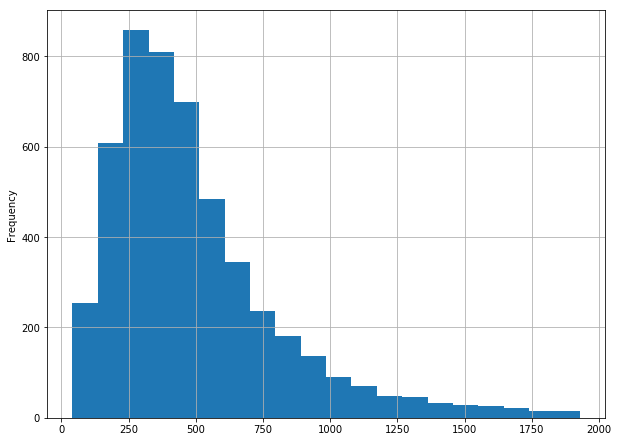

In [436]:
#Dpendent data normal
data_new['total_spent_on_card'].plot.hist(bins=20)

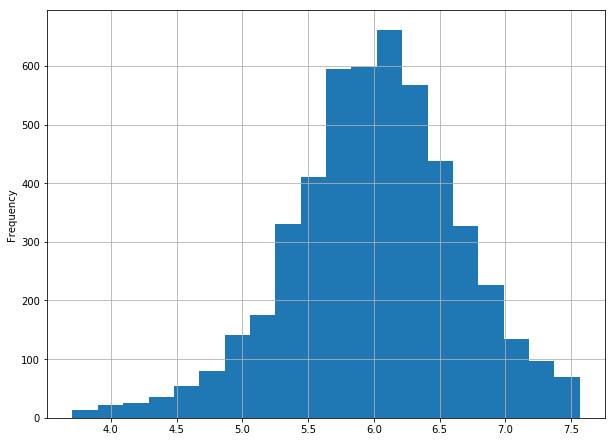

In [437]:
np.log(data_new['total_spent_on_card']).plot.hist(bins=20)

In [438]:
data_new['ln_Total_Spend'] = np.log(data_new['total_spent_on_card'])

In [439]:
data_new1 = data_new

In [440]:
data_new1 = data_new1.drop(columns = ['total_spent_on_card'])

In [441]:
data_new1.head()

,custid,townsize,lncreddebt,lnothdebt,commutetime,lnlongten,lncardmon,lncardten,birthmonth_August,birthmonth_December,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,ln_Total_Spend
0,3964-QJWTRG-NPN,2.0,0.18,0.81,22.0,3.54,2.66,4.09,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,5.007029
1,0648-AIPJSP-UVM,5.0,0.20,0.45,29.0,5.80,2.77,6.41,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.350794
2,5195-TLUDJE-HVO,4.0,-0.07,0.93,24.0,7.53,3.14,7.25,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.886021
3,4459-VLPQUH-3OL,3.0,-3.78,0.11,38.0,5.30,3.04,6.53,0,0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5.884464
4,8158-SMTQFB-CNO,2.0,-1.54,-1.74,32.0,4.31,2.85,5.89,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.230147


In [442]:
#correlation matrix
corr = data_new1.corr()
corr.head()

,townsize,lncreddebt,lnothdebt,commutetime,lnlongten,lncardmon,lncardten,birthmonth_August,birthmonth_December,birthmonth_February,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,ln_Total_Spend
townsize,1.000000,-0.029020,-0.002795,0.485978,-0.020067,0.000101,-0.018238,-0.000017,0.019938,-0.024659,...,0.022758,0.002664,0.005331,0.007896,-0.000636,-0.028678,-0.006225,-0.010037,-0.007200,0.007387
lncreddebt,-0.029020,1.000000,0.678886,-0.030197,0.116063,0.027029,0.088556,0.004043,-0.012892,0.001114,...,0.094259,0.033167,0.042579,0.022037,0.074432,0.057307,-0.003939,0.026538,0.053012,0.250481
lnothdebt,-0.002795,0.678886,1.000000,-0.017456,0.144102,0.054661,0.124213,0.010168,-0.022229,0.014687,...,0.103002,0.045185,0.061514,0.042428,0.094089,0.074317,0.005690,0.047281,0.045478,0.273457
commutetime,0.485978,-0.030197,-0.017456,1.000000,-0.015196,-0.003618,-0.006924,0.009059,0.011626,-0.031361,...,-0.011626,-0.002325,0.008817,0.005454,-0.031842,-0.021028,0.004987,-0.011163,-0.004627,0.004392
lnlongten,-0.020067,0.116063,0.144102,-0.015196,1.000000,0.214833,0.846460,0.005184,0.002896,0.018392,...,-0.036032,-0.093480,-0.142243,-0.138616,-0.025131,0.565507,0.011008,0.014113,-0.013425,0.056412


### Removing Multicollinearity

In [443]:
#Data Scaling
sc=StandardScaler()
temp = data_new1
data_scaled=sc.fit_transform(temp)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [444]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
count,4.998000e+03,4.999000e+03,4.999000e+03,5.000000e+03,4.997000e+03,3.581000e+03,3.578000e+03,5.000000e+03,5.000000e+03,5.000000e+03,...,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.607358e-16,4.286318e-18,-3.558977e-17,-1.823874e-16,7.667360e-17,6.452997e-16,-5.276817e-16,-1.624256e-16,-4.030443e-16,-3.714806e-17,...,2.532641e-16,-3.093081e-16,-4.289902e-16,2.136069e-17,5.910605e-16,-1.876499e-16,-4.098277e-16,6.308065e-16,3.906875e-16,-3.640234e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000140e+00,1.000140e+00,1.000100e+00,1.000100e+00,1.000100e+00,...,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.183403e+00,-5.082547e+00,-4.241964e+00,-2.951234e+00,-3.469230e+00,-3.060666e+00,-4.152453e+00,-2.972813e-01,-2.940819e-01,-3.020373e-01,...,-5.015620e-01,-1.312750e+00,-9.592304e-01,-9.508084e-01,-4.666156e-01,-9.466224e-01,-3.020373e-01,-3.862138e-01,-3.381276e-01,-3.559038e+00
25%,-1.183403e+00,-6.438402e-01,-6.353260e-01,-7.393660e-01,-5.829179e-01,-6.363536e-01,-4.831479e-01,-2.972813e-01,-2.940819e-01,-3.020373e-01,...,-5.015620e-01,-1.312750e+00,-9.592304e-01,-9.508084e-01,-4.666156e-01,-9.466224e-01,-3.020373e-01,-3.862138e-01,-3.381276e-01,-5.927962e-01
50%,2.193358e-01,3.964204e-02,3.814937e-02,-5.879115e-02,1.507875e-01,-1.700389e-02,1.824469e-01,-2.972813e-01,-2.940819e-01,-3.020373e-01,...,-5.015620e-01,7.617599e-01,-9.592304e-01,-9.508084e-01,-4.666156e-01,-9.466224e-01,-3.020373e-01,-3.862138e-01,-3.381276e-01,3.549764e-02
75%,9.207051e-01,6.681315e-01,6.761786e-01,6.217837e-01,7.329009e-01,6.908244e-01,6.773763e-01,-2.972813e-01,-2.940819e-01,-3.020373e-01,...,-5.015620e-01,7.617599e-01,1.042502e+00,1.051737e+00,-4.666156e-01,1.056387e+00,-3.020373e-01,-3.862138e-01,-3.381276e-01,6.498636e-01
max,1.622074e+00,3.787010e+00,3.768848e+00,3.854514e+00,2.345840e+00,4.123792e+00,2.648561e+00,3.363818e+00,3.400414e+00,3.310849e+00,...,1.993771e+00,7.617599e-01,1.042502e+00,1.051737e+00,2.143091e+00,1.056387e+00,3.310849e+00,2.589239e+00,2.957463e+00,2.420784e+00


#### Factor Analysis

In [445]:
from sklearn.decomposition import PCA

In [449]:
data_scaled = pd.DataFrame(data_scaled).fillna(data_scaled.mean())

In [450]:
#no of columns
data_new1.shape

(5000, 126)

In [452]:
var_ratio={}
for n in range(2,126):
    pc=PCA(n_components=n)
    data_pca=pc.fit(data_scaled)
    var_ratio[n]=sum(data_pca.explained_variance_ratio_)
    
var_ratio

{2: 0.17366249863990996,
 3: 0.21411356325625344,
 4: 0.24912965441727197,
 5: 0.2790012890613549,
 6: 0.30761283530053773,
 7: 0.32536327408062277,
 8: 0.3426719916966992,
 9: 0.3588582473211773,
 10: 0.37351372742850497,
 11: 0.3877654573920323,
 12: 0.40082928608531504,
 13: 0.4116502636609448,
 14: 0.42219756147826293,
 15: 0.4326357514936389,
 16: 0.4429364040630226,
 17: 0.45250771117949395,
 18: 0.4621739897170411,
 19: 0.47176639783289737,
 20: 0.48058893286306714,
 21: 0.48953526627656957,
 22: 0.4989721097940585,
 23: 0.5080338209766415,
 24: 0.5167702546490007,
 25: 0.5263123509110241,
 26: 0.5349542148083385,
 27: 0.5436535092524241,
 28: 0.5525646113020846,
 29: 0.5608985221677845,
 30: 0.5703009306585457,
 31: 0.578364115460999,
 32: 0.5873635844665076,
 33: 0.5960285426072125,
 34: 0.6046588767153647,
 35: 0.6128008784821978,
 36: 0.6216738078077512,
 37: 0.6295469880813388,
 38: 0.6372101465614597,
 39: 0.6459783206338485,
 40: 0.6539228333724686,
 41: 0.662003525369179

In [453]:
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([  9.79,  17.36,  21.41,  24.91,  27.9 ,  30.76,  32.54,  34.27,
        35.89,  37.36,  38.79,  40.1 ,  41.31,  42.42,  43.49,  44.54,
        45.53,  46.51,  47.48,  48.44,  49.38,  50.31,  51.23,  52.14,
        53.05,  53.96,  54.86,  55.75,  56.64,  57.52,  58.39,  59.26,
        60.12,  60.98,  61.83,  62.66,  63.49,  64.31,  65.13,  65.95,
        66.76,  67.56,  68.35,  69.14,  69.93,  70.71,  71.49,  72.26,
        73.03,  73.79,  74.54,  75.29,  76.03,  76.76,  77.49,  78.22,
        78.94,  79.65,  80.35,  81.05,  81.74,  82.43,  83.11,  83.78,
        84.43,  85.06,  85.68,  86.27,  86.86,  87.4 ,  87.93,  88.44,
        88.94,  89.43,  89.9 ,  90.36,  90.81,  91.25,  91.68,  92.1 ,
        92.5 ,  92.89,  93.27,  93.64,  94.  ,  94.35,  94.69,  95.02,
        95.34,  95.65,  95.96,  96.26,  96.55,  96.83,  97.1 ,  97.37,
        97.63,  97.88,  98.12,  98.34,  98.55,  98.73,  98.89,  99.03,
        99.16,  99.28,  99.37,  99.45,  99.52,  99.59,  99.65,  99.71,
      

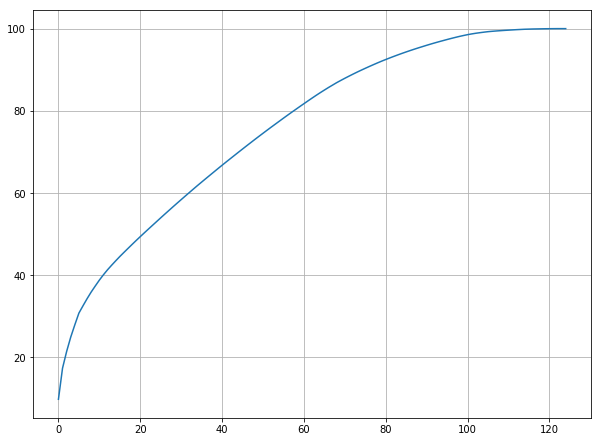

In [454]:
plt.plot(var1)

In [455]:
pc_final=PCA(n_components=61).fit(data_scaled)

reduced_cr=pc_final.fit_transform(data_scaled)

In [456]:
#pc_final.components_
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=temp.columns).T
Loadings.to_csv("Loadings.csv")
#pd.DataFrame(reduced_cr).head(5)

#### finals reduced variables after applying Factor Analysis

In [460]:
new_vars = ['townsize',
'lnlongten',
'lncardten',
'birthmonth_December',
'birthmonth_January',
'birthmonth_March',
'birthmonth_November',
'age',
'agecat',
'ed',
'edcat',
'employ',
'empcat',
'lninc',
'inccat',
'debtinc',
'marital',
'spoused',
'spousedcat',
'reside',
'pets',
'pets_freshfish',
'addresscat',
'cars',
'carown',
'cartype',
'carvalue',
'carcatvalue',
'commutecat',
'commutecar',
'polparty',
'cardtenure',
'cardtenurecat',
'card2',
'card2tenure',
'card2tenurecat',
'carditems',
'card2items',
'tenure',
'lnlongmon',
'tollfree',
'tollten',
'equip',
'equipmon',
'equipten',
'wireless',
'wiremon',
'wireten',
'voice',
'pager',
'internet',
'callid',
'callwait',
'forward',
'confer',
'ebill',
'ownpda',
'ownpc',
'ownfax',
'news',
'ln_Total_Spend'
]


In [461]:
temp.shape

(5000, 125)

new_vars = ['longmon',
'longten',
'creddebt',
'lnlongmon',
'age',
'agecat',
'equipmon',
'employ',
'equip',
'lncreddebt',
'carditems',
'card2items',
'voice',
'income',
'pager',
'equipten',
'card2benefit',
'ebill',
'wiremon',
'carvalue',
'lnlongten',
'lninc',
'wireten',
'pets',
'pets_freshfish',
'empcat',
'lnwireten',
'carcatvalue',
'cardtenure',
'ownfax',
'card2fee',
'inccat',
'birthmonth',
'ed',
'edcat',
'card2spent',
'wireless',
'card2tenure',
'total_spent_on_card',
'tollten',
'cardspent',
'lntollten',
'address',
'tenure',
'cardten',
'internet',
'lnequipten',
'cardmon',
'commutecat',
'lncardmon',
'addresscat',
'card2tenurecat',
'cardtenurecat',
'commute',
'lncardten',
'othdebt',
'ownpda',
'debtinc',
'jobcat',
'lnothdebt',
'news',
]

#### new data based on reduced variables

In [462]:
temp = temp[new_vars]
temp.head()

,townsize,lnlongten,lncardten,birthmonth_December,birthmonth_January,birthmonth_March,birthmonth_November,age,agecat,ed,...,callid,callwait,forward,confer,ebill,ownpda,ownpc,ownfax,news,ln_Total_Spend
0,2.0,3.54,4.09,0,0,0,0,20.0,2.0,15.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.007029
1,5.0,5.80,6.41,0,0,0,0,22.0,2.0,17.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.350794
2,4.0,7.53,7.25,0,0,0,0,67.0,6.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.886021
3,3.0,5.30,6.53,0,0,0,0,23.0,2.0,16.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5.884464
4,2.0,4.31,5.89,0,0,0,0,26.0,3.0,16.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,6.230147


## Building Model

#### OLS model
train/test split

In [463]:
train, test = train_test_split( temp,
                                test_size = 0.3,
                                random_state = 123 )

In [464]:
print(len( train ))
print(len( test))

3500
1500


In [465]:
all_columns = "+".join(train.columns.difference( ['ln_Total_Spend'] ))

print(all_columns)

addresscat+age+agecat+birthmonth_December+birthmonth_January+birthmonth_March+birthmonth_November+callid+callwait+carcatvalue+card2+card2items+card2tenure+card2tenurecat+carditems+cardtenure+cardtenurecat+carown+cars+cartype+carvalue+commutecar+commutecat+confer+debtinc+ebill+ed+edcat+empcat+employ+equip+equipmon+equipten+forward+inccat+internet+lncardten+lninc+lnlongmon+lnlongten+marital+news+ownfax+ownpc+ownpda+pager+pets+pets_freshfish+polparty+reside+spoused+spousedcat+tenure+tollfree+tollten+townsize+voice+wireless+wiremon+wireten


In [466]:
my_formula = "ln_Total_Spend~" + all_columns

print(my_formula)

ln_Total_Spend~addresscat+age+agecat+birthmonth_December+birthmonth_January+birthmonth_March+birthmonth_November+callid+callwait+carcatvalue+card2+card2items+card2tenure+card2tenurecat+carditems+cardtenure+cardtenurecat+carown+cars+cartype+carvalue+commutecar+commutecat+confer+debtinc+ebill+ed+edcat+empcat+employ+equip+equipmon+equipten+forward+inccat+internet+lncardten+lninc+lnlongmon+lnlongten+marital+news+ownfax+ownpc+ownpda+pager+pets+pets_freshfish+polparty+reside+spoused+spousedcat+tenure+tollfree+tollten+townsize+voice+wireless+wiremon+wireten


In [616]:
import statsmodels.formula.api as smf
                                                        # #simultaneously reducing least contributing variables as per p value
lm=smf.ols(formula='ln_Total_Spend~age+agecat\
           \
           +card2+\
           card2items+carditems\
           +cardtenurecat\
           +ed+equip+equipten\
           +internet+lninc\
           ', data=train).fit()

In [617]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_Total_Spend   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     503.1
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:29:06   Log-Likelihood:                -1828.6
No. Observations:                3500   AIC:                             3681.
Df Residuals:                    3488   BIC:                             3755.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5830      0.058     62.170      0.000       3.470       3.696
age              -0.0031      0.002     -1.901      0.057      -0.006    9.65e-05
agecat            0.0427      0.022      1.910      0.056      -0.001       0.087
card2            -0.0143      0.006     -2.426      0.015      -0.026      -0.003
card2items        0.1175      0.003     41.766      0.000       0.112       0.123
carditems         0.0849      0.002     40.980      0.000       0.081       0.089
cardtenurecat    -0.0219      0.008     -2.825      0.005      -0.037      -0.007
ed               -0.0052      0.003     -2.047      0.041      -0.010      -0.000
equip            -0.0575      0.026     -2.223      0.026      -0.108      -0.007
equipten       4.426e-05    1.3e-05      3.409      0.001    1.88e-05    6.97e-05
internet          0.0216      0.006      3.466      0.001       0.009       0.034
lninc             0.3080      0.010     30.030      0.000       0.288       0.328
==============================================================================
Omnibus:                       71.202   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.100
Skew:                           0.352   Prob(JB):                     4.92e-17
Kurtosis:                       3.136   Cond. No.                     8.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [619]:
pred = lm.predict(test)
pred.head(5)

2648    5.665640
2456    6.624109
4557    6.697246
4884    5.468610
92      6.444393
dtype: float64

In [620]:
train = pd.DataFrame(train).fillna(train.mean())
test = pd.DataFrame(test).fillna(test.mean())

#### metrices to check model accuracy

In [621]:
from sklearn import metrics
import numpy as np
print('RMSE for train:', np.sqrt(metrics.mean_squared_error(np.exp(train.ln_Total_Spend), np.exp(lm.predict(train)))))
print('RMSE for test:', np.sqrt(metrics.mean_squared_error(np.exp(test.ln_Total_Spend), np.exp(lm.predict(test)))))

RMSE for train: 246.08750079158722
RMSE for test: 251.41418280305956


#### Residual plot showing normal distribution means residuals are random

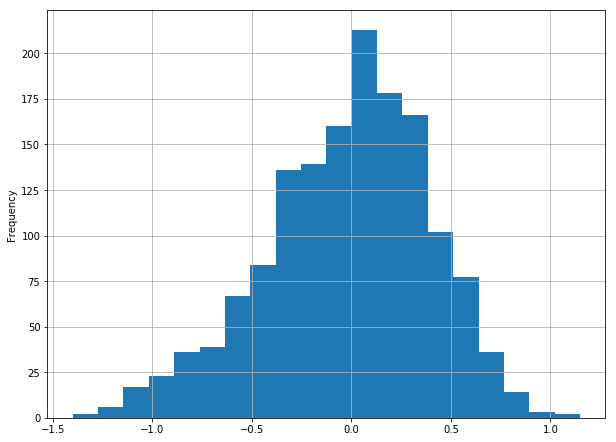

In [622]:
(lm.predict(test) - test.ln_Total_Spend).plot.hist(bins=20)

### Decile Analysis

In [623]:
train['y_pred_train'] = lm.predict(train)
test['y_pred_test'] = lm.predict(test)
train['y_pred_train'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
train['Deciles']=pd.qcut(train['y_pred_train'],10, labels=False)
test['Deciles']=pd.qcut(test['y_pred_test'],10, labels=False)

In [624]:
df = train[['Deciles','ln_Total_Spend', 'y_pred_train']].groupby(train.Deciles).mean()
df1 = test[['Deciles','ln_Total_Spend', 'y_pred_test']].groupby(test.Deciles).mean()

In [625]:
print(df)
print(df1)

         Deciles  ln_Total_Spend  y_pred_train
Deciles                                       
0              0        4.896984      5.078409
1              1        5.454968      5.463420
2              2        5.735342      5.647190
3              3        5.879373      5.804524
4              4        6.019545      5.939907
5              5        6.108684      6.055786
6              6        6.255768      6.183787
7              7        6.347158      6.325035
8              8        6.475342      6.524053
9              9        6.742341      6.893394
         Deciles  ln_Total_Spend  y_pred_test
Deciles                                      
0              0        5.049088     5.147511
1              1        5.603854     5.518381
2              2        5.804939     5.695585
3              3        5.888861     5.832913
4              4        6.051766     5.958171
5              5        6.183913     6.087206
6              6        6.221600     6.210326
7              7      

#### Decile plot for training data

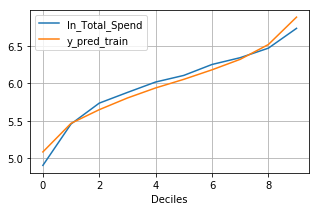

In [626]:
df[-15:].plot(x='Deciles', y=['ln_Total_Spend','y_pred_train']  ,figsize=(5,3), grid=True  )

#### Decile plot for testing data

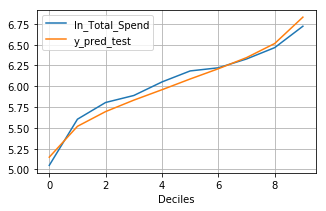

In [627]:
#for testing data
df1[-15:].plot(x='Deciles', y=['ln_Total_Spend', 'y_pred_test'] ,figsize=(5,3), grid=True  )

## DECISION TREE

In [201]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [487]:
data_ml.head()

,townsize,lncreddebt,lnothdebt,commutetime,lnlongten,lncardmon,lncardten,birthmonth_August,birthmonth_December,birthmonth_February,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spent_on_card
0,2.0,0.18,0.81,22.0,3.54,2.66,4.09,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
1,5.0,0.20,0.45,29.0,5.80,2.77,6.41,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
2,4.0,-0.07,0.93,24.0,7.53,3.14,7.25,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
3,3.0,-3.78,0.11,38.0,5.30,3.04,6.53,0,0,0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
4,2.0,-1.54,-1.74,32.0,4.31,2.85,5.89,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,507.83


In [489]:
from sklearn.model_selection import train_test_split
X = data_ml
features = X.columns.difference(['total_spent_on_card'])


train_X, test_X, train_y, test_y = train_test_split( X[features],
                                                  X['total_spent_on_card'],
                                                  test_size = 0.3,
                                                  random_state = 113 )

In [490]:
train_X = pd.DataFrame(train_X).fillna(train_X.mean())
test_X = pd.DataFrame(test_X).fillna(test_X.mean())
train_y = pd.DataFrame(train_y).fillna(train_y.mean())
test_y = pd.DataFrame(test_y).fillna(test_y.mean())

In [292]:
param_grid = {'max_depth':[4,5,6,7],                           #parameters
              'min_samples_split':[100,125,110,120]}

In [293]:
treedt = GridSearchCV(tree.DecisionTreeRegressor(), param_grid, cv = 5)
treedt.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 5, 6, 7], 'min_samples_split': [100, 125, 110, 120]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [294]:
treedt.best_params_

{'max_depth': 7, 'min_samples_split': 125}

In [97]:
model = tree.DecisionTreeRegressor(criterion='mse', max_depth= 5, min_samples_split = 125)  #fine tuning the model

model.fit(train_X, train_y)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=125, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [296]:

print('RMSE train :', np.sqrt(metrics.mean_squared_error(train_y, model.predict(train_X))))
print('RMSE test :', np.sqrt(metrics.mean_squared_error(test_y, model.predict(test_X))))

RMSE train : 225.2957141168501
RMSE test : 242.31529264179176


#### Most important features as per DT

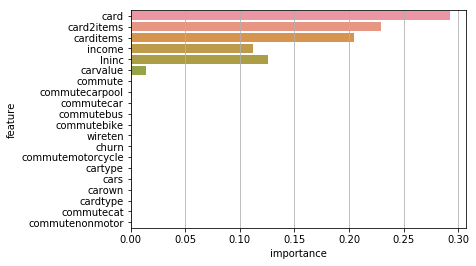

In [299]:
import seaborn as sn
indices = np.argsort(reg_ran.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range (train_X.shape[1]):
    feature_rank.loc[f] = [f+1, train_X.columns[indices[f]], model.feature_importances_[indices[f]]]
sn.barplot(y = 'feature', x = 'importance', data = feature_rank[0:20]) 

#### residuals distribution is normal means random residuals

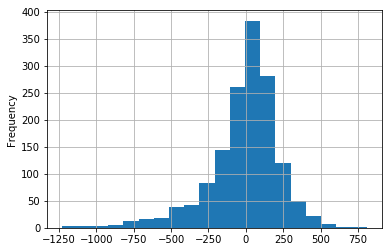

In [98]:
(model.predict(test_X) - test_y.total_spent_on_card).plot.hist(bins=20)

## BAGGING

In [188]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[150,175,200], 'max_samples':[100,200,300]}

In [189]:
from sklearn.ensemble import BaggingRegressor
#params = BaggingRegressor('oob_score' = True, 'n_estimators'= 100)
tree = GridSearchCV(BaggingRegressor(), param_grid, cv = 5)
tree.fit( train_X, train_y )

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [175], 'max_samples': [300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [190]:
tree.best_params_

{'max_samples': 300, 'n_estimators': 175}

In [241]:
reg_bag = BaggingRegressor(n_estimators=175,oob_score= True, max_samples= 300)
reg_bag.fit( train_X, train_y )

NameError: name 'BaggingRegressor' is not defined

In [198]:
from sklearn import metrics
print('RMSE for train :', np.sqrt(metrics.mean_squared_error(train_y, reg_bag.predict(train_X))))
print('RMSE for test :', np.sqrt(metrics.mean_squared_error(test_y, reg_bag.predict(test_X))))

RMSE for train : 205.5271194470146
RMSE for test : 227.05983403008094


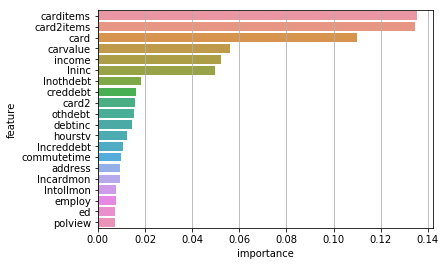

In [199]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in reg_bag.estimators_
], axis=0)
feature_importances
import seaborn as sn
indices = np.argsort(feature_importances)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range (train_X.shape[1]):
    feature_rank.loc[f] = [f+1, train_X.columns[indices[f]], feature_importances[indices[f]]]
sn.barplot(y = 'feature', x = 'importance', data = feature_rank[0:20]) 

#### residuals showing normal distribution means random residuals

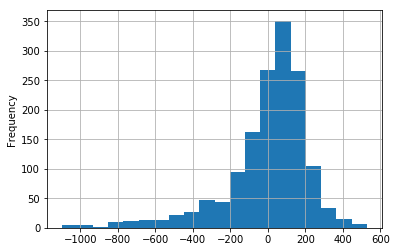

In [187]:
(reg_bag.predict(test_X) - test_y.total_spent_on_card).plot.hist(bins=20)

## RANDOM FOREST

In [242]:
from sklearn.ensemble import RandomForestRegressor

In [237]:
RandomForestRegressor?

In [248]:
param_grid = {'max_depth': [9,10,11], 'n_estimators': [100,200,300],'min_samples_split':[1200,1100,1000],'min_samples_leaf':[50,100,200,500]}

In [ ]:
#param_grid = {'min_samples_leaf' : [1,5,10,50,100,200,500]}

In [250]:
param_grid = {'max_depth': [9,10,11], 'n_estimators': [100,200,300]}

In [251]:
tree2 = GridSearchCV(RandomForestRegressor(), param_grid, cv = 3)
tree2.fit( train_X, train_y )

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [9, 10, 11], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [253]:
print(tree2.best_params_)
print(tree2.best_score_)


{'max_depth': 9, 'n_estimators': 300}
0.5183919089289054


In [203]:
RandomForestRegressor?

In [243]:
reg_ran = RandomForestRegressor(
 max_depth= 10,
 min_samples_leaf= 75,   
 min_samples_split= 1000,
 n_estimators= 100)
reg_ran.fit( train_X, train_y )

C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=75, min_samples_split=1000,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [244]:
print('RMSE for train :', np.sqrt(metrics.mean_squared_error(train_y, reg_ran.predict(train_X))))
print('RMSE for test :', np.sqrt(metrics.mean_squared_error(test_y, reg_ran.predict(test_X))))

RMSE for train : 262.49282470406035
RMSE for test : 266.7062092302883


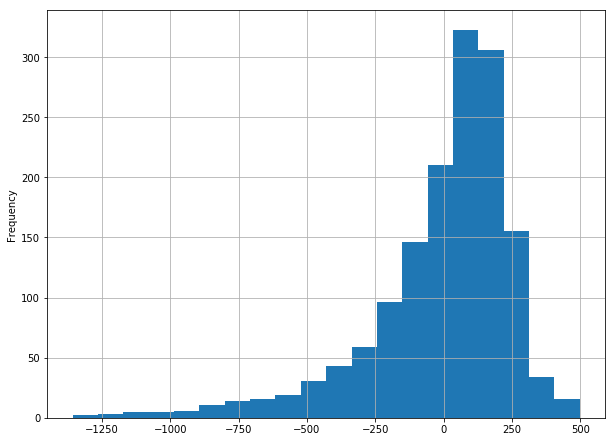

In [245]:
(reg_ran.predict(test_X) - test_y.total_spent_on_card).plot.hist(bins=20)

#### Variable importance plot

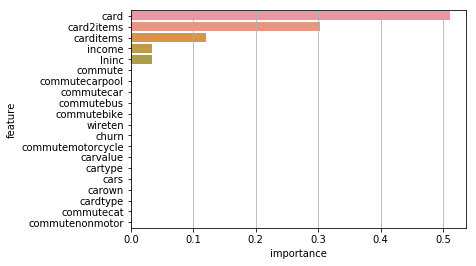

In [252]:
import seaborn as sn
indices = np.argsort(reg_ran.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range (train_X.shape[1]):
    feature_rank.loc[f] = [f+1, train_X.columns[indices[f]], reg_ran.feature_importances_[indices[f]]]
sn.barplot(y = 'feature', x = 'importance', data = feature_rank[0:20])  

## ADABOOST

In [253]:
from sklearn.ensemble import AdaBoostRegressor

In [254]:
param_grid12 = {'learning_rate':[1.2,1.3,1.4,1.5,1.6] ,'n_estimators':[50]}

In [255]:
tree2 = GridSearchCV(AdaBoostRegressor(), param_grid12, cv = 5)
tree2.fit( train_X, train_y )

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [1.2, 1.3, 1.4, 1.5, 1.6], 'n_estimators': [50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [256]:
tree2.best_params_

{'learning_rate': 1.4, 'n_estimators': 50}

In [262]:
reg_mod = AdaBoostRegressor(learning_rate= 0.8, n_estimators= 50)
reg_mod.fit(train_X, train_y)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=0.8, loss='linear',
         n_estimators=50, random_state=None)

In [263]:
print('RMSE for train :', np.sqrt(metrics.mean_squared_error(train_y, reg_mod.predict(train_X))))
print('RMSE for test :', np.sqrt(metrics.mean_squared_error(test_y, reg_mod.predict(test_X))))

RMSE for train : 277.7296921013807
RMSE for test : 285.1764624913257


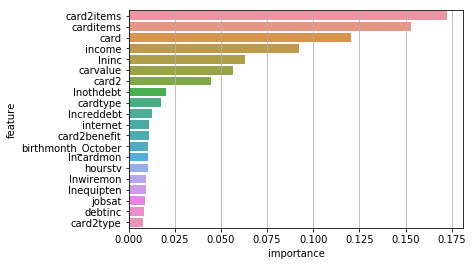

In [264]:
import seaborn as sn
indices = np.argsort(reg_mod.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range (train_X.shape[1]):
    feature_rank.loc[f] = [f+1, train_X.columns[indices[f]], reg_mod.feature_importances_[indices[f]]]
sn.barplot(y = 'feature', x = 'importance', data = feature_rank[0:20]) 

#### residuals showing normal distribution means random residuals

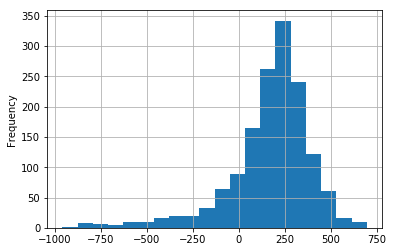

In [265]:
(reg_mod.predict(test_X) - test_y.total_spent_on_card).plot.hist(bins=20)

## GBM

In [268]:
np.corrcoef?

In [744]:
from sklearn.ensemble import GradientBoostingRegressor

In [758]:
from sklearn.model_selection import train_test_split
X = data_ml
features = X.columns.difference(['total_spent_on_card'])


train_X, test_X, train_y, test_y = train_test_split( X[features],
                                                  X['total_spent_on_card'],
                                                  test_size = 0.3,
                                                  random_state = 113 )
train_X = pd.DataFrame(train_X).fillna(train_X.mean())
test_X = pd.DataFrame(test_X).fillna(test_X.mean())
train_y = pd.DataFrame(train_y).fillna(train_y.mean())
test_y = pd.DataFrame(test_y).fillna(test_y.mean())

In [482]:
param_grid = {'learning_rate':[0.70,0.8,0.1],
              'n_estimators':[60,70,100,125],
#              'max_depth': [4,5,6,7],
#              'min_samples_split' : [30,35,40],
#              'alpha': [0.85],
#              'subsample' : [0.8]
              }

In [491]:
tree2 = GridSearchCV(GradientBoostingRegressor(), param_grid, cv = 5)
tree2.fit( train_X, train_y )

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.7, 0.8, 0.1], 'n_estimators': [60, 70, 100, 125]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [628]:
print(tree2.best_params_)
print(tree2.best_score_)
print(pd.DataFrame(tree2.cv_results_))

{'learning_rate': 0.1, 'n_estimators': 100}
0.5511582530556113
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.755971      0.028105         0.003757        0.001936   
1        0.845933      0.042025         0.001995        0.002443   
2        1.177339      0.028486         0.004331        0.002606   
3        1.446270      0.007930         0.004447        0.000749   
4        0.721059      0.010466         0.003998        0.001999   
5        0.862128      0.054031         0.004004        0.003743   
6        1.164393      0.018027         0.004007        0.002003   
7        1.447706      0.044364         0.005255        0.003233   
8        0.763628      0.009430         0.002701        0.002272   
9        0.870453      0.008604         0.003000        0.002450   
10       1.270603      0.115505         0.004240        0.002641   
11       1.518839      0.083165         0.003203        0.002641   

   param_learning_rate param_n_estimators  \
0      

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\util

In [652]:
param_grid = {'learning_rate':[0.1],
              'n_estimators':[100],
              'max_depth': [3,5,7,9],
              'min_samples_split' : [80,100,120,140],
#              'alpha': [0.85],
#              'subsample' : [0.8]
              }

In [653]:
tree2 = GridSearchCV(GradientBoostingRegressor(), param_grid, cv = 5)
tree2.fit( train_X, train_y )
print(tree2.best_params_)
print(tree2.best_score_)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 100, 'n_estimators': 100}
0.5559041068870627


In [654]:
param_grid = {'learning_rate':[0.1],
              'n_estimators':[100],
              'max_depth': [3],
              'min_samples_split' : [100],
              'min_samples_leaf':[2,5,8,10,20]
#              'alpha': [0.85],
#              'subsample' : [0.8]
              }

In [735]:
tree2 = GridSearchCV(GradientBoostingRegressor(), param_grid, cv = 10,refit = False)
tree2.fit( train_X, train_y )
print(tree2.best_params_)
print(tree2.best_score_)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

KeyboardInterrupt: 

In [ ]:
tree2.best_params_

In [762]:
reg_gbm = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 3,
 min_samples_leaf= 10,
 min_samples_split= 100,
 n_estimators = 100)
reg_gbm.fit( train_X, train_y )

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=10,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [768]:
reg_gbm.predict(train_X)

array([399.99221356, 313.70532231, 488.89200283, ..., 836.44326699,
       349.60426511, 335.25528104])

In [772]:
test_y.head()

,total_spent_on_card
1359,435.66
4787,193.91
919,100.48
3710,290.71
4836,309.45


In [770]:
pd.DataFrame(reg_gbm.predict(test_X)).head()         #train predicted data

,0
0,386.334447
1,211.862489
2,133.654209
3,425.244570
4,328.608742


##### RMSE

In [748]:
print('RMSE for train :', np.sqrt(metrics.mean_squared_error(train_y, reg_gbm.predict(train_X))))
print('RMSE for test :', np.sqrt(metrics.mean_squared_error(test_y, reg_gbm.predict(test_X))))

RMSE for train : 189.49411212153944
RMSE for test : 204.0412264835937


##### MAE

In [749]:
print('MAE for train :', (metrics.mean_absolute_error(train_y, reg_gbm.predict(train_X))))
print('MAE for test :', (metrics.mean_absolute_error(test_y, reg_gbm.predict(test_X))))

MAE for train : 131.13761715161561
MAE for test : 142.54110496925782


##### MSE

In [750]:
print('MSE for train :', (metrics.mean_squared_error(train_y, reg_gbm.predict(train_X))))
print('MSE for test :', (metrics.mean_squared_error(test_y, reg_gbm.predict(test_X))))

MSE for train : 35908.018528730565
MSE for test : 41632.82210492918


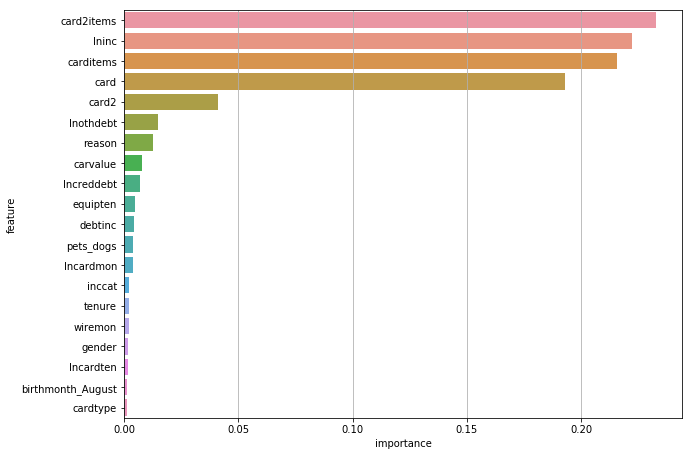

In [751]:
import seaborn as sn
indices = np.argsort(reg_gbm.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range (train_X.shape[1]):
    feature_rank.loc[f] = [f+1, train_X.columns[indices[f]], reg_gbm.feature_importances_[indices[f]]]
temp = sn.barplot(y = 'feature', x = 'importance', data = feature_rank[0:20]) 


#### Decile Analysis

In [752]:
train_X['y_pred_train'] = reg_gbm.predict(train_X)
test_X['y_pred_test'] = reg_gbm.predict(test_X)
train_X['y_pred_train'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
train_X['Deciles']=pd.qcut(train_X['y_pred_train'],10, labels=False)
test_X['Deciles']=pd.qcut(test_X['y_pred_test'],10, labels=False)
train_X['actual_value'] = train_y
test_X['actual_value'] = test_y
df3 = train_X[['Deciles','actual_value', 'y_pred_train']].groupby(train_X.Deciles).mean()
df4 = test_X[['Deciles','actual_value', 'y_pred_test']].groupby(test_X.Deciles).mean()

In [774]:
df3.to_csv('temp1.csv')

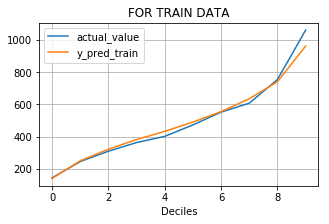

In [753]:
df3[-15:].plot(x='Deciles', y=['actual_value','y_pred_train']  ,figsize=(5,3), grid=True , title = 'FOR TRAIN DATA' )

In [775]:
df4.to_csv('temp2.csv')

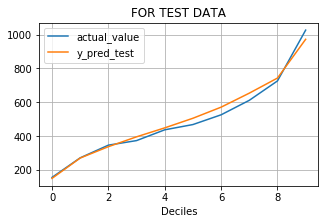

In [754]:
df4[-15:].plot(x='Deciles', y=['actual_value','y_pred_test']  ,figsize=(5,3), grid=True ,title = 'FOR TEST DATA'  )

#### residuals showing random distribution means random residuals

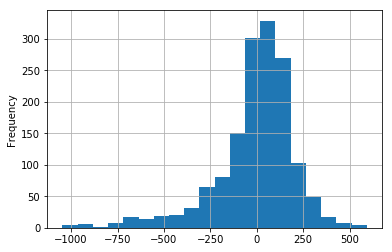

In [325]:
(reg_gbm.predict(test_X) - test_y.total_spent_on_card).plot.hist(bins=20)

# KNN

In [273]:
from sklearn.neighbors import KNeighborsRegressor
params = {'n_neighbors': [20,25,30,35], 'p': [2, 3]}

In [274]:
tree3 = GridSearchCV(KNeighborsRegressor(), params, cv=5)
tree3.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [20, 25, 30, 35], 'p': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [275]:
tree3.best_score_

0.0028838413834677556

In [76]:
tree3.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=35, p=2,
          weights='uniform')

In [77]:
reg_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=35, p=2,
          weights='uniform')
reg_knn.fit( train_X, train_y )

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=35, p=2,
          weights='uniform')

In [78]:
print('RMSE for train :', np.sqrt(metrics.mean_squared_error(train_y, reg_knn.predict(train_X))))
print('RMSE for test :', np.sqrt(metrics.mean_squared_error(test_y, reg_knn.predict(test_X))))

RMSE for train : 309.7633447797905
RMSE for test : 317.2391166011632


# SVM

In [127]:
from sklearn.svm import SVR 

In [79]:
svr = SVR()

params = {
    'kernel': ['rbf'],
    'C': [0.01,0.1, 10, 100, 1000,10000]
}

In [80]:
svr1 = GridSearchCV(svr, params, cv=5)
svr1.fit(train_X, train_y)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'C': [0.01, 0.1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [254]:
svr?

In [82]:
svr1.best_params_

{'C': 10000, 'kernel': 'rbf'}

In [87]:
reg_svm =  SVR(C=10, cache_size=2000, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.0001, verbose=False)
reg_svm.fit(train_X, train_y)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=10, cache_size=2000, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.0001, verbose=False)

In [88]:
print('RMSE for train :', np.sqrt(metrics.mean_squared_error(train_y, reg_svm.predict(train_X))))
print('RMSE for test :', np.sqrt(metrics.mean_squared_error(test_y, reg_svm.predict(test_X))))

RMSE for train : 320.66370773903486
RMSE for test : 329.367724722944


# ANN

In [240]:
from sklearn.neural_network import MLPRegressor

In [242]:
params = {'hidden_layer_sizes': [(3,2),(4,3),(5,4)],
    'alpha': [0.75,0.80,0.85],}
ran_reg = GridSearchCV(MLPRegressor(),
                   params,
                   cv=5)
ran_reg.fit(train_X, train_y)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(3, 2), (4, 3), (5, 4)], 'alpha': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [245]:
ran_reg.best_estimator_

MLPRegressor(activation='relu', alpha=0.85, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [246]:
sol = MLPRegressor(activation='relu', alpha=0.85, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
sol.fit(train_X, train_y)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.85, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [274]:
print('RMSE for train :', np.sqrt(metrics.mean_squared_error(train_y, sol.predict(train_X))))
print('RMSE for test :', np.sqrt(metrics.mean_squared_error(test_y, sol.predict(test_X))))

RMSE for train : 222.84578014069123
RMSE for test : 230.4709580495628
